In [1]:
import pandas as pd
df=pd.read_csv('Accord-242A-Fall24.csv')

In [2]:
df.columns

Index(['MonthNumeric', 'MonthFactor', 'Year', 'AccordSales', 'Unemployment',
       'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled'],
      dtype='object')

In [3]:
# df['CPIAll'] = (df['CPIAll'] / df['CPIAll'].shift(1))*1000-1000
# df['CPIEnergy'] = (df['CPIEnergy'] / df['CPIEnergy'].shift(1))*1000-1000
# df=df.drop(0)

In [4]:
month_dummy = pd.get_dummies(df['MonthFactor'], prefix='Is', drop_first=True,dtype=int)
df = pd.concat([df, month_dummy], axis=1)

In [5]:
Train = df[(df['Year'] <= 2018)]
Test = df[(df['Year'] >= 2019) & (df['Year'] < 2023)]

In [6]:
x_train = Train[['CPIAll', 'CPIEnergy', 'AccordQueries']]
y_train = Train['AccordSales']
import statsmodels.api as sm
X_train=sm.add_constant(x_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.475
Date:                Mon, 23 Sep 2024   Prob (F-statistic):            0.00227
Time:                        19:06:00   Log-Likelihood:                -596.69
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      56   BIC:                             1210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.419e+05   3.36e+04      4.224

In [7]:
import numpy as np
def OSR2(model, df_train, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST

def OSR2(y_test, y_pred, y_train):
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return 1 - SSE/SST

In [8]:
x_test = Test[['CPIAll', 'CPIEnergy', 'AccordQueries']]
y_test = Test['AccordSales']
X_test=sm.add_constant(x_test)

y_pred = model.predict(X_test)
print(OSR2(y_test,y_pred,y_train))

0.7162040279726278


In [9]:
import numpy as np
x_train=Train.iloc[:,4:]
y_train=Train['AccordSales']
x_test=Test.iloc[:,4:]
y_test=Test['AccordSales']
test_year=Test['Year']

In [10]:
#x_train=x_train.drop('4 WEEKS COUPON EQUIVALENT')

In [11]:
x_train=x_train.drop(columns=['Is_October','Is_March','Is_June','Is_July','Is_November','Is_September','Unemployment','MilesTraveled'])
x_test=x_test.drop(columns=['Is_October','Is_March','Is_June','Is_July','Is_November','Is_September','Unemployment','MilesTraveled'])

In [12]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
print(Train.iloc[:,4:].corr())

               Unemployment  AccordQueries    CPIAll  CPIEnergy  \
Unemployment       1.000000      -0.679005 -0.885009   0.441073   
AccordQueries     -0.679005       1.000000  0.658533  -0.208894   
CPIAll            -0.885009       0.658533  1.000000  -0.014197   
CPIEnergy          0.441073      -0.208894 -0.014197   1.000000   
MilesTraveled     -0.946057       0.673330  0.858453  -0.466227   
Is_August         -0.018596       0.212497  0.031582   0.022351   
Is_December       -0.092979      -0.211279  0.078161  -0.075891   
Is_February        0.092979      -0.035923 -0.087861  -0.019737   
Is_January         0.092979      -0.152827 -0.104997  -0.007093   
Is_July           -0.018596       0.365933  0.012319   0.016358   
Is_June            0.003719       0.132125  0.003740   0.041152   
Is_March           0.070664       0.066367 -0.068608  -0.011791   
Is_May             0.026034       0.073674 -0.017939   0.019254   
Is_November       -0.070664      -0.211279  0.074747  -0.02458

In [14]:
#correlation_table = x_train.corr()
#print(correlation_table)

In [15]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)
X_test=sm.add_constant(x_test)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     15.52
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.81e-11
Time:                        19:06:00   Log-Likelihood:                -567.40
No. Observations:                  60   AIC:                             1153.
Df Residuals:                      51   BIC:                             1172.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.55e+05   2.25e+04      6.897

In [16]:
s="$"+str(model.params[0].round(1))+" "
for i in range(len(x_train.columns)):
    if(model.params[i+1]>0):
        s+="+"
    s+=" "+str(model.params[i+1].round(1))
    s+="*\\text{"+str(x_train.columns[i].replace("_",""))+"} "
s+="$"
print(s)

$155018.2 + 167.2*\text{AccordQueries}  -631.1*\text{CPIAll} + 58.5*\text{CPIEnergy} + 6674.1*\text{IsAugust} + 3995.0*\text{IsDecember}  -6160.1*\text{IsFebruary}  -9002.2*\text{IsJanuary} + 4109.6*\text{IsMay} $


C:\Users\Milli\AppData\Local\Temp\ipykernel_14704\954209716.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s="$"+str(model.params[0].round(1))+" "
C:\Users\Milli\AppData\Local\Temp\ipykernel_14704\954209716.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(model.params[i+1]>0):
C:\Users\Milli\AppData\Local\Temp\ipykernel_14704\954209716.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s+=" "+str(model.params[i+1].round(

In [17]:
y_pred = model.predict(X_test)
print(OSR2(y_test,y_pred,y_train))

0.6449929578781157


In [18]:
import sklearn.metrics
y_pred = model.predict(X_test)
sklearn.metrics.r2_score(y_test, y_pred)

-1.3130735897788086

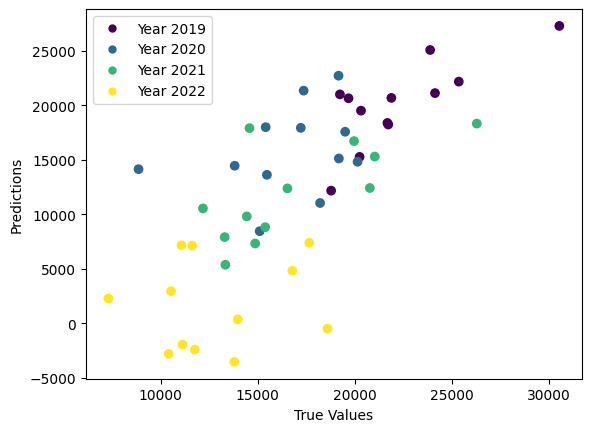

In [19]:
import matplotlib.pyplot as plt
sc=plt.scatter(y_test,y_pred,c=test_year)
#plt.xlim(3000,32000)
#plt.ylim(3000,32000)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), mec="none",
                        label="Year {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(Test["Year"])]
plt.legend(handles=handles)

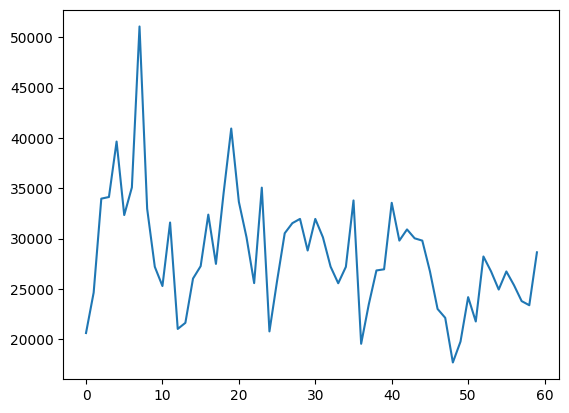

In [20]:
plt.plot(y_train)

In [21]:
import numpy as np
np.corrcoef(y_test, y_pred)[1, 1]**2

np.float64(1.0)

In [22]:
X_tmp=x_train=Train[['AccordQueries', 'CPIAll', 'CPIEnergy']]
Y_tmp=Train["MilesTraveled"]
# X_tmp=x_train=Train[['AccordQueries', 'CPIAll']]
# Y_tmp=Train["CPIEnergy"]

In [23]:
import statsmodels.api as sm
X_tmp=sm.add_constant(x_train)
model=sm.OLS(Y_tmp,X_tmp).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MilesTraveled   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     312.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           6.05e-35
Time:                        19:06:00   Log-Likelihood:                -529.69
No. Observations:                  60   AIC:                             1067.
Df Residuals:                      56   BIC:                             1076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.485e+04    1.1e+04      4.078

In [24]:
1/(1-model.rsquared)

np.float64(17.76502108331361)

In [25]:
ndf=pd.read_csv("bill-rates-2002-2023.csv")

In [26]:
ndf.columns

Index(['Date', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT',
       '8 WEEKS BANK DISCOUNT', '8 WEEKS COUPON EQUIVALENT',
       '13 WEEKS BANK DISCOUNT', '13 WEEKS COUPON EQUIVALENT',
       '17 WEEKS BANK DISCOUNT', '17 WEEKS COUPON EQUIVALENT',
       '26 WEEKS BANK DISCOUNT', '26 WEEKS COUPON EQUIVALENT',
       '52 WEEKS BANK DISCOUNT', '52 WEEKS COUPON EQUIVALENT'],
      dtype='object')

In [27]:
ndf = ndf[['Date', '4 WEEKS COUPON EQUIVALENT']]

In [28]:
def getMedianofMonthYear(ndf):
    ndf['Date'] = pd.to_datetime(ndf['Date'])
    ndf['Year'] = ndf['Date'].dt.year
    ndf['MonthNumeric'] = ndf['Date'].dt.month
    ndf['YearMonth'] = ndf['Year'].astype(str) + "-" + ndf['MonthNumeric'].astype(str)
    ndf['YearMonth'] = pd.to_datetime(ndf['YearMonth'])
    ndf['YearMonth'] = ndf['YearMonth'].dt.strftime('%Y-%m')
    ndf = ndf.groupby(['YearMonth']).median()
    return ndf

In [29]:
tmpdf=getMedianofMonthYear(ndf)

C:\Users\Milli\AppData\Local\Temp\ipykernel_14704\1202269718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ndf['Date'] = pd.to_datetime(ndf['Date'])


In [30]:
len(df)

119

In [31]:
# Assuming both df and ndf have 'Year' and 'Month' columns

# Merge the two dataframes on 'Year' and 'Month'
df = df.merge(tmpdf[['Year', 'MonthNumeric', '4 WEEKS COUPON EQUIVALENT']], on=['Year', 'MonthNumeric'], how='left')

# Now 'df' will have the '4 WEEKS COUPON EQUIVALENT' column added


In [32]:
df.head(10)

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Is_August,...,Is_February,Is_January,Is_July,Is_June,Is_March,Is_May,Is_November,Is_October,Is_September,4 WEEKS COUPON EQUIVALENT
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,0,...,0,1,0,0,0,0,0,0,0,0.01
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,0,...,1,0,0,0,0,0,0,0,0,0.04
2,3,March,2014,33962,6.7,79,236.028,249.961,251120,0,...,0,0,0,0,1,0,0,0,0,0.05
3,4,April,2014,34124,6.2,74,236.468,249.864,251959,0,...,0,0,0,0,0,0,0,0,0,0.02
4,5,May,2014,39637,6.3,75,236.918,249.213,252289,0,...,0,0,0,0,0,1,0,0,0,0.03
5,6,June,2014,32329,6.1,76,237.231,249.714,252054,0,...,0,0,0,1,0,0,0,0,0,0.02
6,7,July,2014,35073,6.2,81,237.498,248.744,252111,0,...,0,0,1,0,0,0,0,0,0,0.02
7,8,August,2014,51075,6.1,80,237.460,245.699,252472,1,...,0,0,0,0,0,0,0,0,0,0.03
8,9,September,2014,32956,5.9,75,237.477,241.610,253485,0,...,0,0,0,0,0,0,0,0,1,0.01
9,10,October,2014,27189,5.7,70,237.430,237.061,254117,0,...,0,0,0,0,0,0,0,1,0,0.02


In [33]:
Train = df[(df['Year'] <= 2018)]
Test = df[(df['Year'] >= 2019) & (df['Year'] < 9999)]
x_train=Train.iloc[:,4:]
y_train=Train['AccordSales']
x_test=Test.iloc[:,4:]
y_test=Test['AccordSales']
test_year=Test['Year']
x_train=x_train.drop(columns=['Is_October','Is_March','Is_June','Is_July','Is_November','Is_September','Unemployment','MilesTraveled'])
x_test=x_test.drop(columns=['Is_October','Is_March','Is_June','Is_July','Is_November','Is_September','Unemployment','MilesTraveled'])

In [34]:
X_train=sm.add_constant(x_train)
X_test=sm.add_constant(x_test)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.01e-10
Time:                        19:06:00   Log-Likelihood:                -567.22
No. Observations:                  60   AIC:                             1154.
Df Residuals:                      50   BIC:                             1175.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [35]:
y_pred = model.predict(X_test)
print(OSR2(y_test,y_pred,y_train))

0.45203526430039953


In [36]:
y_pred = model.predict(X_test)
sklearn.metrics.r2_score(y_test, y_pred)

-3.133607333628631

In [ ]:
!pip install -U notebook-as-pdf